In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from grid import Grid, grid
import folium
from matplotlib import ticker
import pandas as pd
import numpy as np
from icecream import ic
from pandarallel import pandarallel
from folium.plugins import BeautifyIcon
pandarallel.initialize(progress_bar=False, use_memory_fs=False)
BT_ICONS = ['train', 'phone', 'shopping-cart', 'car', 'motorcycle', 'graduation-cap', 'road', 'address', 'fax', 'government', 'luggage', 'cutlery', 'table-tennis', 'bank', 'car-rental', 'building-mixed', 'home', 'mountains', 'star-of-life', 'settings']
COLORS = ['#88e99a', '#256b33', '#85d2e1', '#326f9c', '#7f87f2', '#8711ac', '#d45fea', '#5a396e', '#f7c5f1', '#9b1b5c', '#fd048f',
          '#cf749b', '#1945c5', '#bfcd8e', '#744822', '#e9ad6f', '#ae301f', '#b1e632', '#fa7922', '#65f112', '#f4d403', '#2524f9', '#fa1bfc']
sns.set(font_scale=1.5)

plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.edgecolor']='black'
plt.rcParams['font.size']=24

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [11]:
COLORS = {
    'PL':'#2f7fc1',
    'OPT-LOC-DP': '#c497b2',
    'OPT-SEM-IND':'#d8383a',
    'USS':'#96c37d',
    'ESSA':'#f3d266'
}

MARKERS = {
    'PL': 'o',
    'OPT-LOC-DP': '^',
    'OPT-SEM-IND': 's',
    'USS': 'x',
    'ESSA': '*'
}

# Map

In [ ]:
informative_user_df = pd.read_csv(f'../data/SHLOM_geolife_informative_SAMPING_{SUBSAMPLE_INTERVAL_MINUTE}_MIN_{MINIMUM_INFORMATIVE_SAMPLE_CNT}.csv', index_col=0)
informative_user_df['region'] = informative_user_df.region.astype(int)
u_df = informative_user_df.query('uid == 22')

p1, p2 = u_df.iloc[0], u_df.query('region==38').iloc[0]

m = grid.map(location=[(p1.lat+p2.lat)/2, (p1.lon+p2.lon)/2], tiles='https://{s}.basemaps.cartocdn.com/rastertiles/voyager_nolabels/{z}/{x}/{y}{r}.png', attr='Carto', zoom_start=16)

folium.Marker(location=[p1['lat'], p1['lon']]).add_to(m)
folium.Circle([p1.lat, p1.lon], radius=200, fill_color='#8ecfc9', color='#fa7f6f').add_to(m)
p1_nearby_poi_idx = poi_tree.query_ball_point(p1[['x', 'y']], r=RADIUS)
p1_nearby_poi = poi_df.iloc[p1_nearby_poi_idx]
selected_poi = p1_nearby_poi.query('bt in @SELECTED_BT')
for p_lat, p_lon, bt, st in selected_poi[['lat', 'lon', 'bt', 'st']].values:
    icon = BeautifyIcon(icon=SELECTED_BT_ICON_COLOR[int(bt)][0], text_color=SELECTED_BT_ICON_COLOR[int(bt)][1], border_color=SELECTED_BT_ICON_COLOR[int(bt)][1])
    folium.Marker([p_lat, p_lon], icon=icon).add_to(m)

folium.Marker(location=[p2['lat'], p2['lon']]).add_to(m)
folium.Circle([p2.lat, p2.lon], radius=200, fill_color='#8ecfc9', color='#fa7f6f').add_to(m)
p2_nearby_poi_idx = poi_tree.query_ball_point(p2[['x', 'y']], r=RADIUS)
p2_nearby_poi = poi_df.iloc[p2_nearby_poi_idx]
selected_poi = p2_nearby_poi.query('bt in @SELECTED_BT')
for p_lat, p_lon, bt, st in selected_poi[['lat', 'lon', 'bt', 'st']].values:
    icon = BeautifyIcon(icon=SELECTED_BT_ICON_COLOR[int(bt)][0], text_color=SELECTED_BT_ICON_COLOR[int(bt)][1], border_color=SELECTED_BT_ICON_COLOR[int(bt)][1])
    folium.Marker([p_lat, p_lon], icon=icon).add_to(m)
m

In [ ]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.edgecolor']='black'
plt.rcParams['font.size']=24

from matplotlib.ticker import MaxNLocator

def format_fn(tick_val, tick_pos):
    if int(tick_val) in range(5):
        return [SELECTED_BT_ICON_COLOR[c][2] for c in SELECTED_BT_ICON_COLOR][int(tick_val)]
    else:
        return ''

fig, axs = plt.subplots(1, 2)
fig.set_figheight(9)
fig.set_figwidth(20)

axs[0].bar(
    x=np.arange(len(SELECTED_BT)), 
    height=p1_nearby_poi.query('bt in @SELECTED_BT').groupby('bt').count().lat,
    color=[SELECTED_BT_ICON_COLOR[c][1] for c in SELECTED_BT_ICON_COLOR],
)
axs[0].set_xlim([-1, 5])
axs[0].xaxis.set_major_formatter(format_fn)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_ylabel('Number of nearby PoIs')
axs[0].set_xlabel('(a)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].yaxis.set_label_coords(-.1, .5)
axs[0].xaxis.set_label_coords(.5, -.35)
axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[0].text(0.5, -0.3, f'Category', transform=axs[0].transAxes, ha='center')

p2_dist = p2_nearby_poi.query('bt in @SELECTED_BT').groupby('bt').count().lat
p2_dist_full = pd.Series(index=SELECTED_BT, data=0)
p2_dist_full[p2_dist.index] = p2_dist
axs[1].bar(
    x=np.arange(len(SELECTED_BT)), 
    height=p2_dist_full,
    color=[SELECTED_BT_ICON_COLOR[c][1] for c in SELECTED_BT_ICON_COLOR],
)
axs[1].set_xlim([-1, 5])
axs[1].xaxis.set_major_formatter(format_fn)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].set_xlabel('(b)')
axs[1].xaxis.set_label_coords(.5, -.35)
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_yticks([0,1,2,3,4,5,6,7])
axs[1].tick_params(axis='both', which='major', labelsize=24)
axs[1].text(0.5, -0.3, f'Category', transform=axs[1].transAxes, ha='center')

plt.savefig("../graph/model_two_location_poi_distribution.pdf", bbox_inches="tight", dpi=300)
plt.savefig("../graph/model_two_location_poi_distribution.jpg", bbox_inches="tight", dpi=300)

# X vs epsilon in 1d(6)

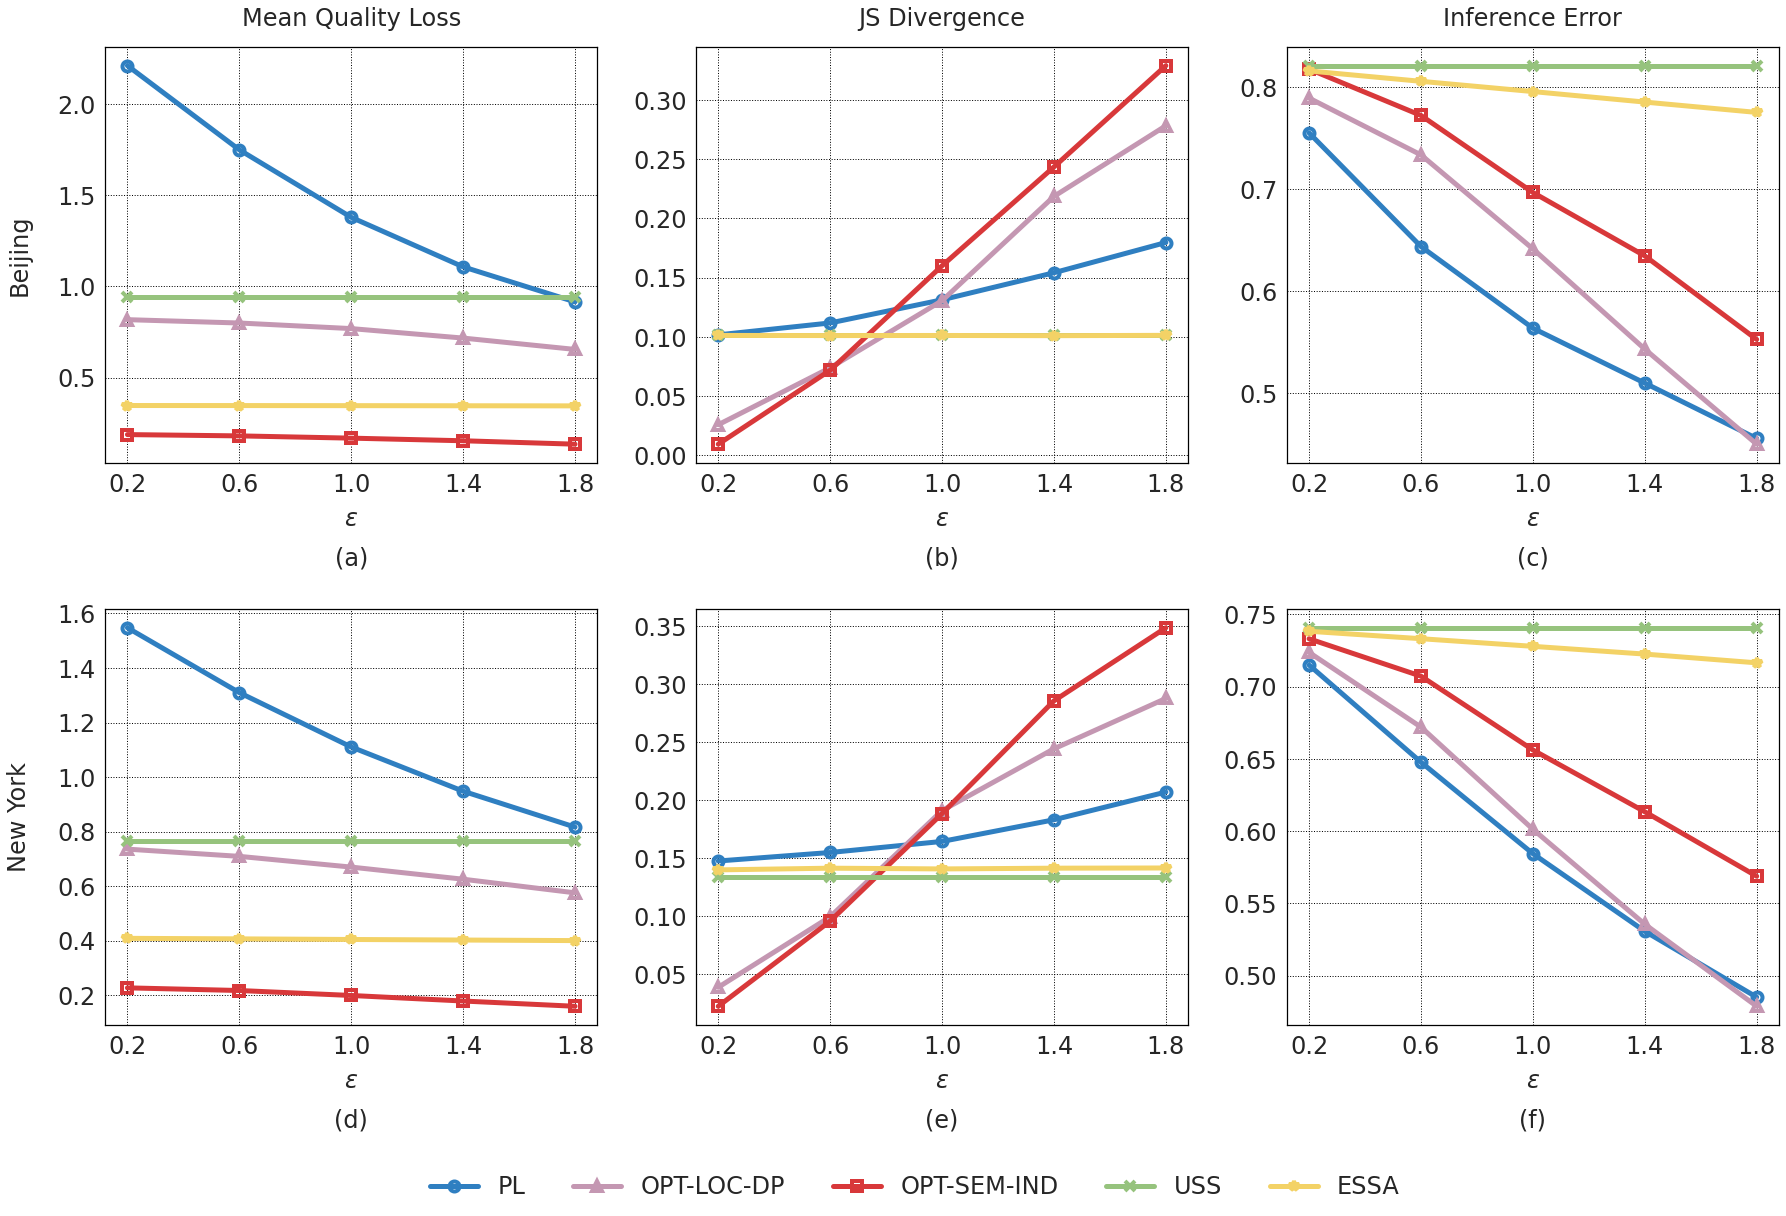

In [125]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(18)
fig.set_figwidth(30)

COLORS = {
    'PL':'#2f7fc1',
    'OPT-LOC-DP': '#c497b2',
    'OPT-SEM-IND':'#d8383a',
    'USS':'#96c37d',
    'ESSA':'#f3d266'
}

MARKERS = {
    'PL': 'o',
    'OPT-LOC-DP': '^',
    'OPT-SEM-IND': 's',
    'USS': 'x',
    'ESSA': '*'
}

bj_df = pd.read_csv('../result/BJ_x_vs_epsilon.csv', index_col=0)
ny_df = pd.read_csv('../result/NY_x_vs_epsilon.csv', index_col=0)

methods = ['PL', 'OPT-LOC-DP', 'OPT-SEM-IND', 'USS', 'ESSA']
epsilons = bj_df.epsilon.unique()

# BEIJING
df = bj_df
ax = axs[0]
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['mean_ql'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    ax[0].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])

for m in methods:
    y = df.query('method == @m').groupby('epsilon')['kl_div'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    ax[1].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])

for m in methods:
    y = df.query('method == @m').groupby('epsilon')['adv_err'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    ax[2].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
# PARIS
df = ny_df
ax = axs[1]
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['mean_ql'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    ax[0].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])

for m in methods:
    y = df.query('method == @m').groupby('epsilon')['kl_div'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    ax[1].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])

for m in methods:
    y = df.query('method == @m').groupby('epsilon')['adv_err'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    ax[2].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
for i in range(2):
    for j in range(3):
        axs[i][j].grid(True, lw=1, ls='dotted', c='black')
        axs[i][j].set_xlabel(f'({chr(97+i*3+j)})', )
        axs[i][j].xaxis.set_label_coords(0.5, -.2, transform=axs[i][j].transAxes)
        axs[i][j].text(0.5, -0.15, f'$\epsilon$', transform=axs[i][j].transAxes, ha='center')
        axs[i][j].set_xticks(df.epsilon.unique())
        axs[i][j].tick_params(axis='both', which='major', labelsize=24)
        
axs[0][0].legend(bbox_to_anchor=(0.5, 0), loc='center', ncol=5, facecolor='white', edgecolor='white', bbox_transform=fig.transFigure, fontsize=24)
axs[0][0].text(0.5, 1.05, 'Mean Quality Loss', transform=axs[0][0].transAxes, ha='center')
axs[0][1].text(0.5, 1.05, 'JS Divergence', transform=axs[0][1].transAxes, ha='center')
axs[0][2].text(0.5, 1.05, 'Inference Error', transform=axs[0][2].transAxes, ha='center')
axs[0][0].set_ylabel('Beijing')
axs[0][0].yaxis.set_label_coords(-.15, .5)
axs[1][0].set_ylabel('New York')
axs[1][0].yaxis.set_label_coords(-.15, .5)
# fig.tight_layout(h_pad=2)
fig.subplots_adjust(hspace=0.35)
fig.savefig("../graph/x_vs_epsilon_1d_6.jpg", bbox_inches="tight", dpi=160)
fig.savefig("../graph/x_vs_epsilon_1d_6.pdf", bbox_inches="tight", dpi=160)

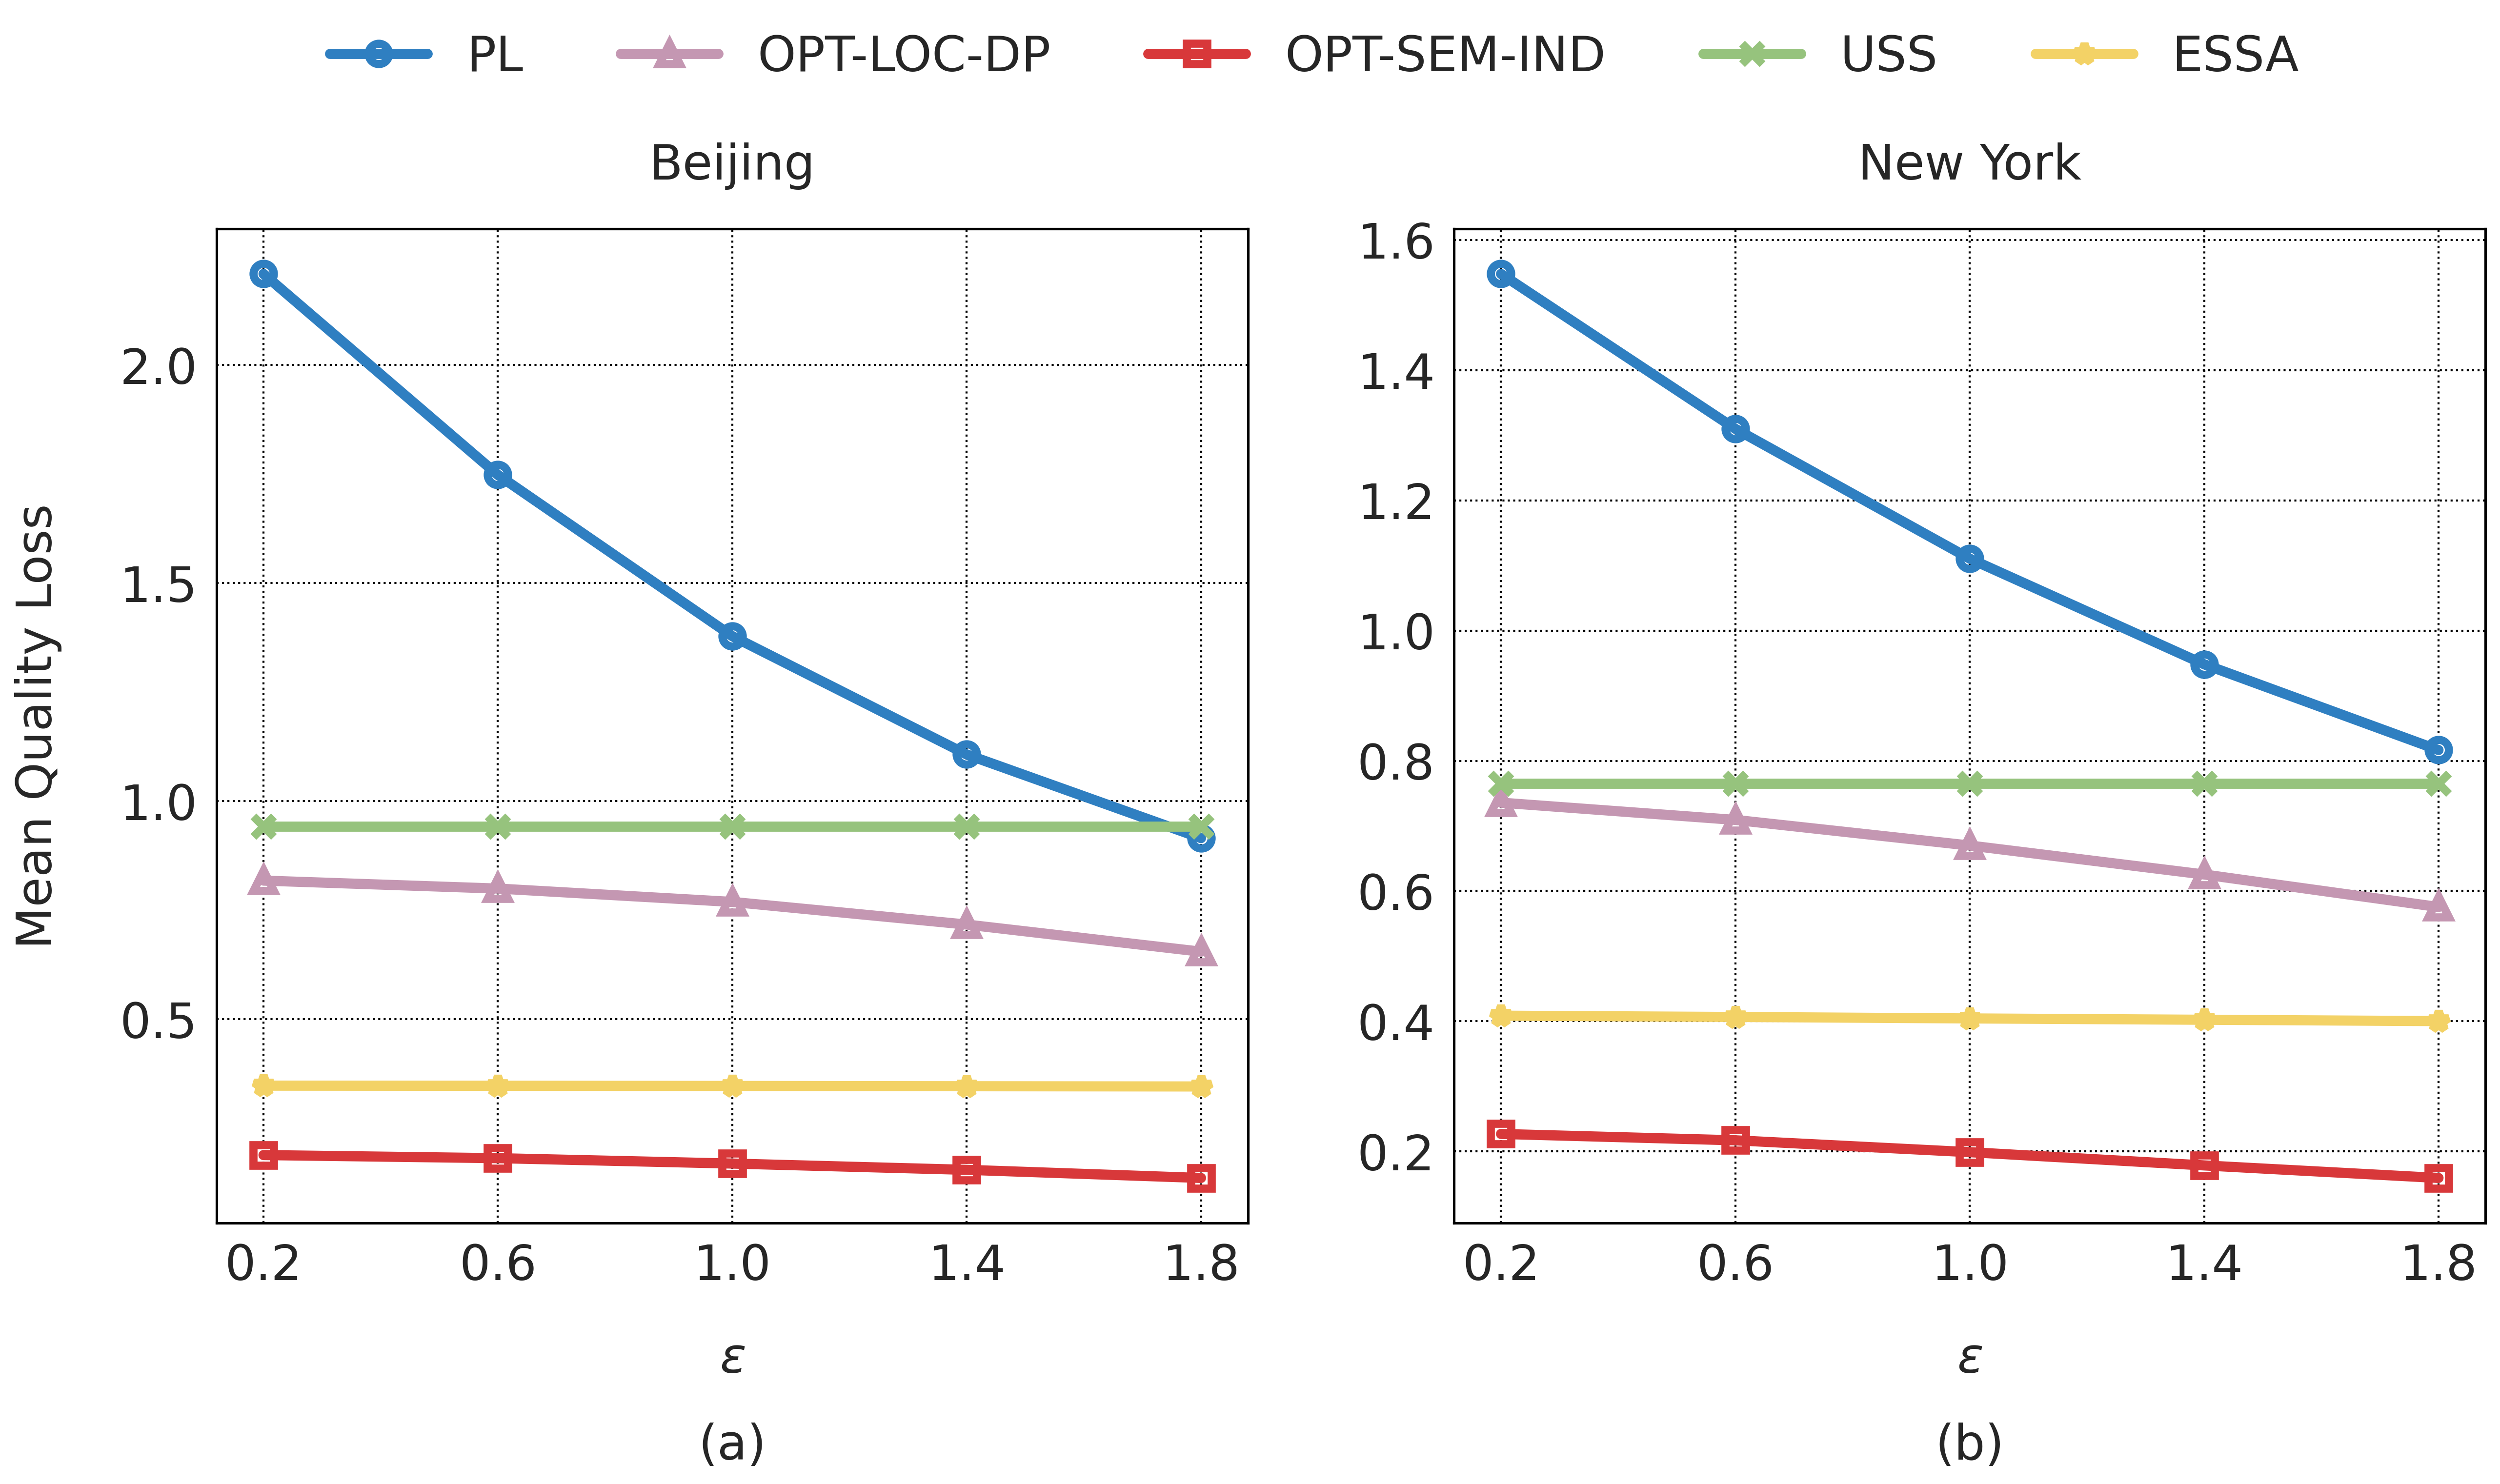

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(20, 9), dpi=300)

# BEIJING
df = bj_df
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['mean_ql'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    axs[0].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
# NEW YORK
df = ny_df
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['mean_ql'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    axs[1].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
axs[0].legend(bbox_to_anchor=(0.5, 1.01), loc='center', ncol=5, facecolor='white', edgecolor='white', bbox_transform=fig.transFigure, fontsize=24)
axs[0].text(0.5, 1.05, 'Beijing', transform=axs[0].transAxes, ha='center', fontsize=24)
axs[1].text(0.5, 1.05, 'New York', transform=axs[1].transAxes, ha='center', fontsize=24)
axs[0].set_ylabel('Mean Quality Loss', fontsize=24)
axs[0].yaxis.set_label_coords(-.15, .5)
axs[0].grid(True, lw=1, ls='dotted', c='black')
axs[1].grid(True, lw=1, ls='dotted', c='black')

axs[0].set_xlabel(f'(a)')
axs[1].set_xlabel(f'(b)')
axs[0].xaxis.set_label_coords(0.5, -.2, transform=axs[0].transAxes)
axs[1].xaxis.set_label_coords(0.5, -.2, transform=axs[1].transAxes)
axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)
axs[0].set_xticks(df.epsilon.unique())
axs[1].set_xticks(df.epsilon.unique())
axs[0].text(0.5, -0.15, f'$\epsilon$', transform=axs[0].transAxes, ha='center')
axs[1].text(0.5, -0.15, f'$\epsilon$', transform=axs[1].transAxes, ha='center')

# fig.tight_layout(h_pad=2)
fig.subplots_adjust(hspace=0.35)
fig.savefig("../graph/meanql_vs_epsilon.jpg", bbox_inches="tight", dpi=300)
fig.savefig("../graph/meanql_vs_epsilon.pdf", bbox_inches="tight", dpi=300)

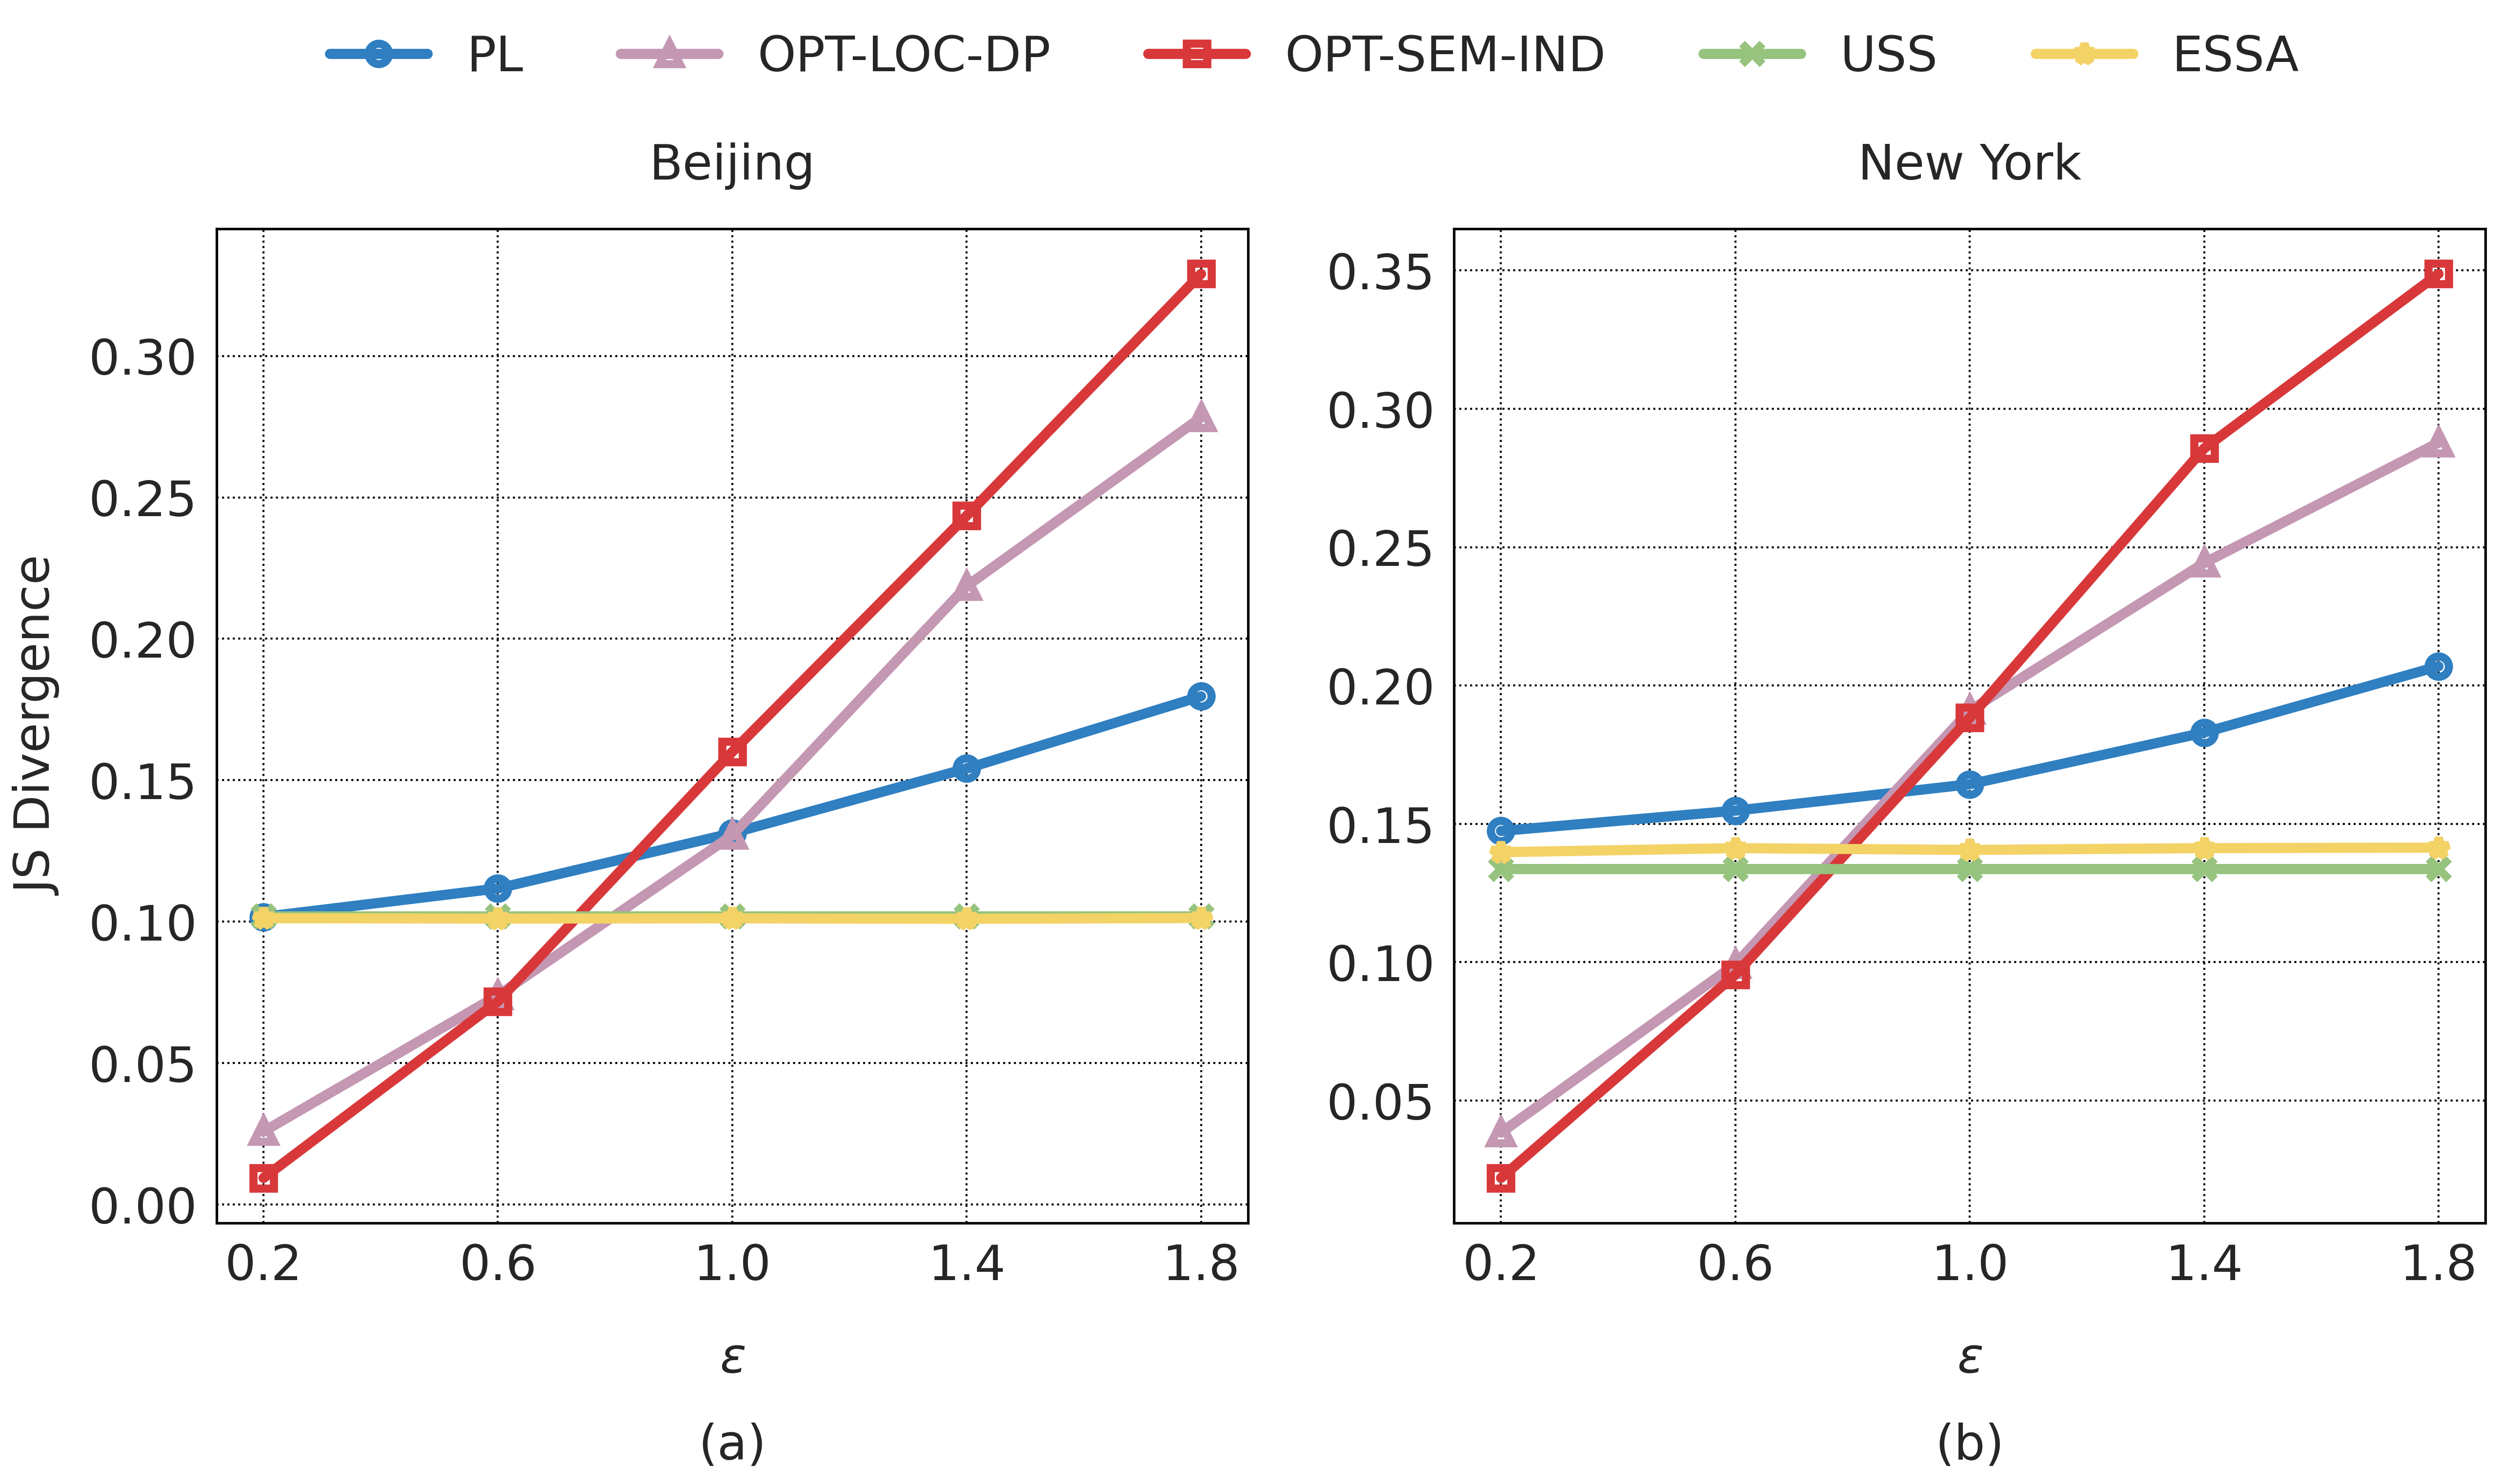

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(20, 9), dpi=300)

df = bj_df
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['kl_div'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    axs[0].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
df = ny_df
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['kl_div'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    axs[1].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
axs[0].legend(bbox_to_anchor=(0.5, 1.01), loc='center', ncol=5, facecolor='white', edgecolor='white', bbox_transform=fig.transFigure, fontsize=24)
axs[0].text(0.5, 1.05, 'Beijing', transform=axs[0].transAxes, ha='center', fontsize=24)
axs[1].text(0.5, 1.05, 'New York', transform=axs[1].transAxes, ha='center', fontsize=24)
axs[0].set_ylabel('JS Divergence', fontsize=24)
axs[0].yaxis.set_label_coords(-.15, .5)
axs[0].grid(True, lw=1, ls='dotted', c='black')
axs[1].grid(True, lw=1, ls='dotted', c='black')

axs[0].set_xlabel(f'(a)')
axs[1].set_xlabel(f'(b)')
axs[0].xaxis.set_label_coords(0.5, -.2, transform=axs[0].transAxes)
axs[1].xaxis.set_label_coords(0.5, -.2, transform=axs[1].transAxes)
axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)
axs[0].set_xticks(df.epsilon.unique())
axs[1].set_xticks(df.epsilon.unique())
axs[0].text(0.5, -0.15, f'$\epsilon$', transform=axs[0].transAxes, ha='center')
axs[1].text(0.5, -0.15, f'$\epsilon$', transform=axs[1].transAxes, ha='center')

# fig.tight_layout(h_pad=2)
fig.subplots_adjust(hspace=0.35)
fig.savefig("../graph/js_vs_epsilon.jpg", bbox_inches="tight", dpi=300)
fig.savefig("../graph/js_vs_epsilon.pdf", bbox_inches="tight", dpi=300)

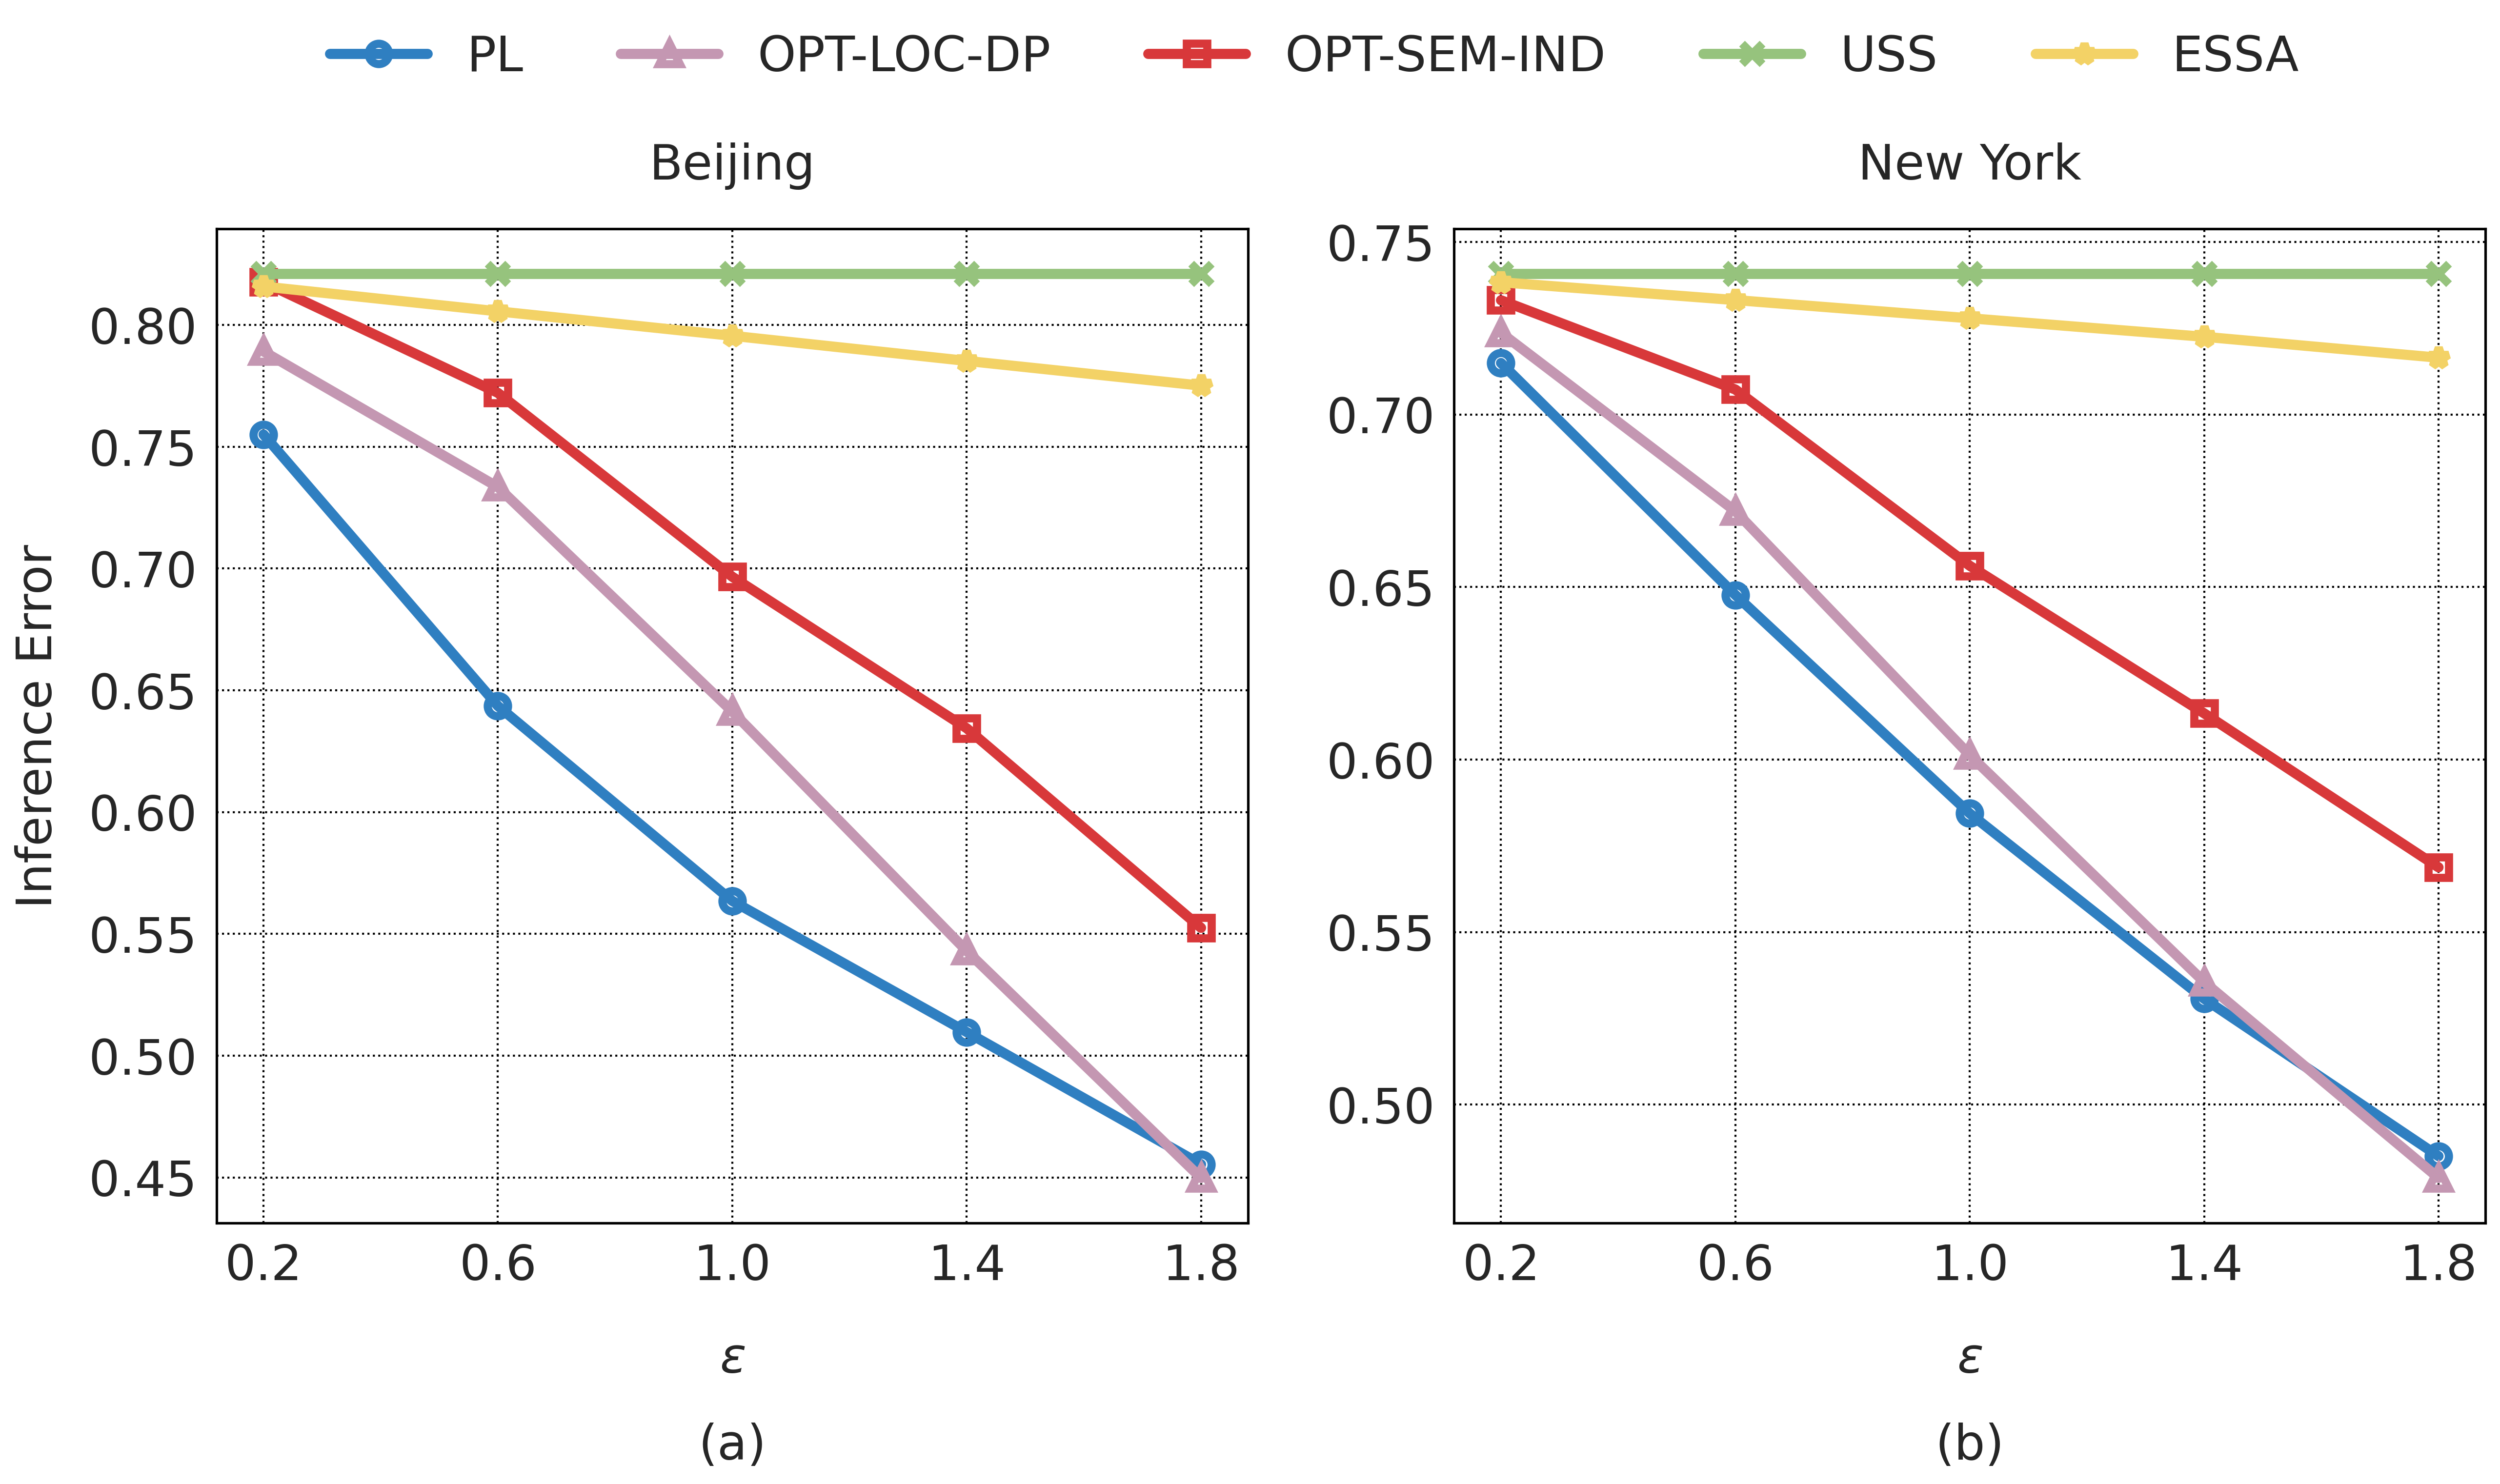

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(20, 9), dpi=300)

df = bj_df
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['adv_err'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    axs[0].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
df = ny_df
for m in methods:
    y = df.query('method == @m').groupby('epsilon')['adv_err'].mean()
    if y.size == 1:
        y = [y for _ in epsilons]
    axs[1].plot(epsilons, y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
axs[0].legend(bbox_to_anchor=(0.5, 1.01), loc='center', ncol=5, facecolor='white', edgecolor='white', bbox_transform=fig.transFigure, fontsize=24)
axs[0].text(0.5, 1.05, 'Beijing', transform=axs[0].transAxes, ha='center', fontsize=24)
axs[1].text(0.5, 1.05, 'New York', transform=axs[1].transAxes, ha='center', fontsize=24)
axs[0].set_ylabel('Inference Error', fontsize=24)
axs[0].yaxis.set_label_coords(-.15, .5)
axs[0].grid(True, lw=1, ls='dotted', c='black')
axs[1].grid(True, lw=1, ls='dotted', c='black')

axs[0].set_xlabel(f'(a)')
axs[1].set_xlabel(f'(b)')
axs[0].xaxis.set_label_coords(0.5, -.2, transform=axs[0].transAxes)
axs[1].xaxis.set_label_coords(0.5, -.2, transform=axs[1].transAxes)
axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)
axs[0].set_xticks(df.epsilon.unique())
axs[1].set_xticks(df.epsilon.unique())
axs[0].text(0.5, -0.15, f'$\epsilon$', transform=axs[0].transAxes, ha='center')
axs[1].text(0.5, -0.15, f'$\epsilon$', transform=axs[1].transAxes, ha='center')

# fig.tight_layout(h_pad=2)
fig.subplots_adjust(hspace=0.35)
fig.savefig("../graph/adv_err_vs_epsilon.jpg", bbox_inches="tight", dpi=300)
fig.savefig("../graph/adv_err_vs_epsilon.pdf", bbox_inches="tight", dpi=300)

# QL vs d

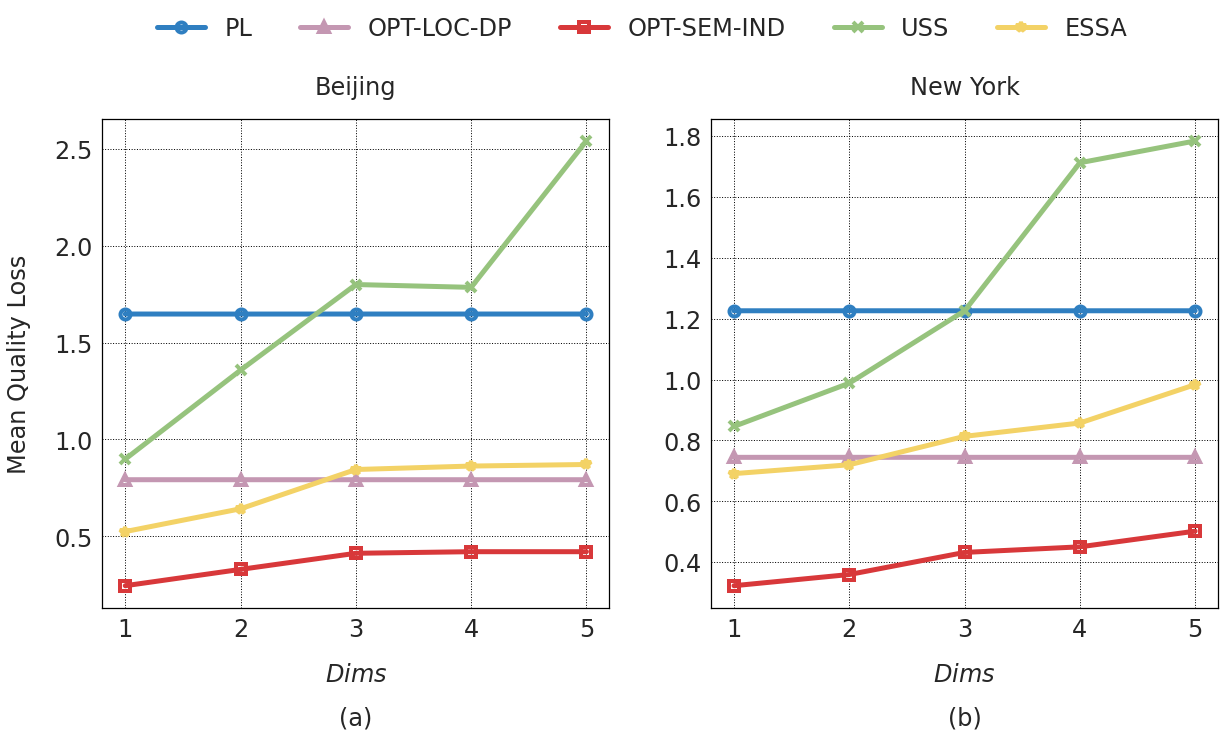

In [148]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(9)
fig.set_figwidth(20)

COLORS = {
    'PL':'#2f7fc1',
    'OPT-LOC-DP': '#c497b2',
    'OPT-SEM-IND':'#d8383a',
    'USS':'#96c37d',
    'ESSA':'#f3d266'
}

MARKERS = {
    'PL': 'o',
    'OPT-LOC-DP': '^',
    'OPT-SEM-IND': 's',
    'USS': 'x',
    'ESSA': '*'
}

bj_ndims_df = pd.read_csv('../result/BJ_x_vs_dims.csv', index_col=0)
pri_ndims_df = pd.read_csv('../result/NY_x_vs_dims.csv', index_col=0)

methods = ['PL', 'OPT-LOC-DP', 'OPT-SEM-IND', 'USS', 'ESSA']

# BEIJING
df = bj_df
ax = axs[0]
for m in methods:
    y = bj_ndims_df.query('method == @m').groupby('ndim')['mean_ql'].mean()
    if y.size == 1:
        y = [y for _ in bj_ndims_df['ndim'].unique()]
    ax.plot(bj_ndims_df['ndim'].unique(), y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
ax.text(0.5, 1.05, 'Beijing', transform=ax.transAxes, ha='center')
ax.text(0.5, -0.15, r'$Dims$', transform=ax.transAxes, ha='center')
ax.set_xlabel('(a)')
ax.xaxis.set_label_coords(.5, -0.2)
ax.set_ylabel('Mean Quality Loss')
ax.yaxis.set_label_coords(-.14, .5)
ax.grid(True, lw=1, ls='dotted', c='black')
ax.legend(bbox_to_anchor=(0.5, 1.02), loc='center', ncol=5, facecolor='white', edgecolor='white', bbox_transform=fig.transFigure, fontsize=24)

# PARIS
df = ny_df
ax = axs[1]
for m in methods:
    y = pri_ndims_df.query('method == @m').groupby('ndim')['mean_ql'].mean()
    if y.size == 1:
        y = [y for _ in bj_ndims_df['ndim'].unique()]
    ax.plot(pri_ndims_df['ndim'].unique(), y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])

ax.text(0.5, 1.05, 'New York', transform=ax.transAxes, ha='center')
ax.text(0.5, -0.15, r'$Dims$', transform=ax.transAxes, ha='center')
ax.set_xlabel('(b)')
ax.xaxis.set_label_coords(.5, -0.2)
ax.grid(True, lw=1, ls='dotted', c='black')

axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)

fig.subplots_adjust(hspace=0.35)
fig.savefig("../graph/ql_vs_dims_2.jpg", bbox_inches="tight", dpi=300)
fig.savefig("../graph/ql_vs_dims_2.pdf", bbox_inches="tight", dpi=300)

# X vs epsilon in |Y| in 1d(6)

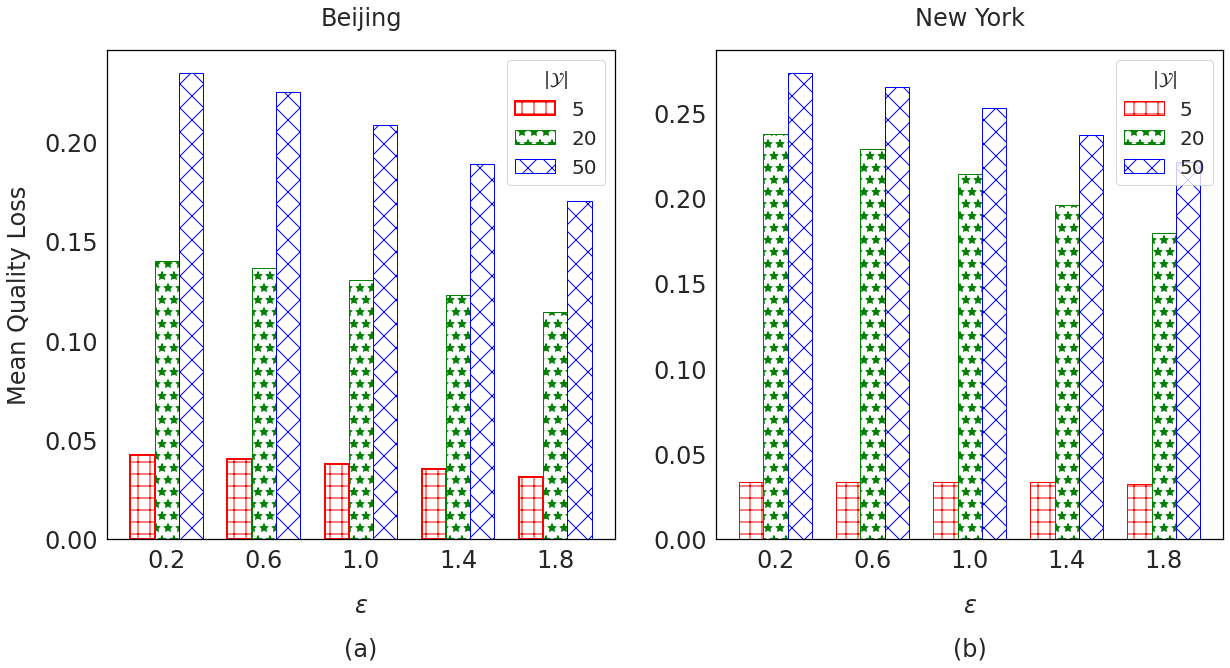

In [146]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(9)
fig.set_figwidth(20)

bj_df = pd.read_csv('../result/BJ_ql_vs_epsilon_c.csv', index_col=0)
ny_df = pd.read_csv('../result/NY_ql_vs_epsilon_c.csv', index_col=0)

bj_c_list = np.array([3, 12, 2])
pri_c_list = np.array([3, 15, 13])

methods = ['OPT-SEM-IND',  'ESSA']
epsilons = bj_df.epsilon.unique()

# BEIJING
df = bj_df
ax = axs[0]
ax.bar(epsilons - 0.1, df.query('method == "OPT-SEM-IND" and c == @bj_c_list[0]').groupby('epsilon')['meanql'].mean(), width=0.1, align='center', color='white', edgecolor='red', hatch='+', label=f'5', linewidth=2.0)
ax.bar(epsilons, df.query('method == "OPT-SEM-IND" and c == @bj_c_list[1]').groupby('epsilon')['meanql'].mean(), width=0.1, align='center', color='white', edgecolor='green', hatch='*', label=f'20')
ax.bar(epsilons + 0.1, df.query('method == "OPT-SEM-IND" and c == @bj_c_list[2]').groupby('epsilon')['meanql'].mean(), width=0.1, align='center', color='white', edgecolor='blue', hatch='x', label=f'50')
ax.set_xticks(df.epsilon.unique())
ax.grid(True)
ax.text(0.5, 1.05, 'Beijing', transform=ax.transAxes, ha='center')
ax.set_ylabel('Mean Quality Loss')
ax.yaxis.set_label_coords(-0.15, .5)
ax.text(0.5, -0.15, f'$\epsilon$', transform=ax.transAxes, ha='center')
ax.set_xlabel('(a)')
ax.xaxis.set_label_coords(.5, -0.2)
ax.legend(title=r'$|\mathcal{Y}|$', fontsize=20)
# ax.grid(True, lw=1, ls='dotted', c='black')

# BEIJING
df = ny_df
ax = axs[1]
ax.bar(epsilons - 0.1, df.query('method == "OPT-SEM-IND" and c == @pri_c_list[0]').groupby('epsilon')['meanql'].mean(), width=0.1, align='center', color='white', edgecolor='red', hatch='+', label=f'5')
ax.bar(epsilons, df.query('method == "OPT-SEM-IND" and c == @pri_c_list[1]').groupby('epsilon')['meanql'].mean(), width=0.1, align='center', color='white', edgecolor='green', hatch='*', label=f'20')
ax.bar(epsilons + 0.1, df.query('method == "OPT-SEM-IND" and c == @pri_c_list[2]').groupby('epsilon')['meanql'].mean(), width=0.1, align='center', color='white', edgecolor='blue', hatch='x', label=f'50')
ax.set_xticks(df.epsilon.unique())
ax.grid(True)
ax.text(0.5, 1.05, 'New York', transform=ax.transAxes, ha='center')
ax.text(0.5, -0.15, f'$\epsilon$', transform=ax.transAxes, ha='center')
ax.set_xlabel('(b)')
ax.xaxis.set_label_coords(.5, -0.2)
ax.legend(title=r'$|\mathcal{Y}|$', fontsize=20)        
axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)

fig.subplots_adjust(hspace=0.35)
fig.savefig("../graph/ql_vs_epsilon_c_1d_6.jpg", bbox_inches="tight", dpi=300)
fig.savefig("../graph/ql_vs_epsilon_c_1d_6.pdf", bbox_inches="tight", dpi=300)

# RT vs X, dims, Epsilon

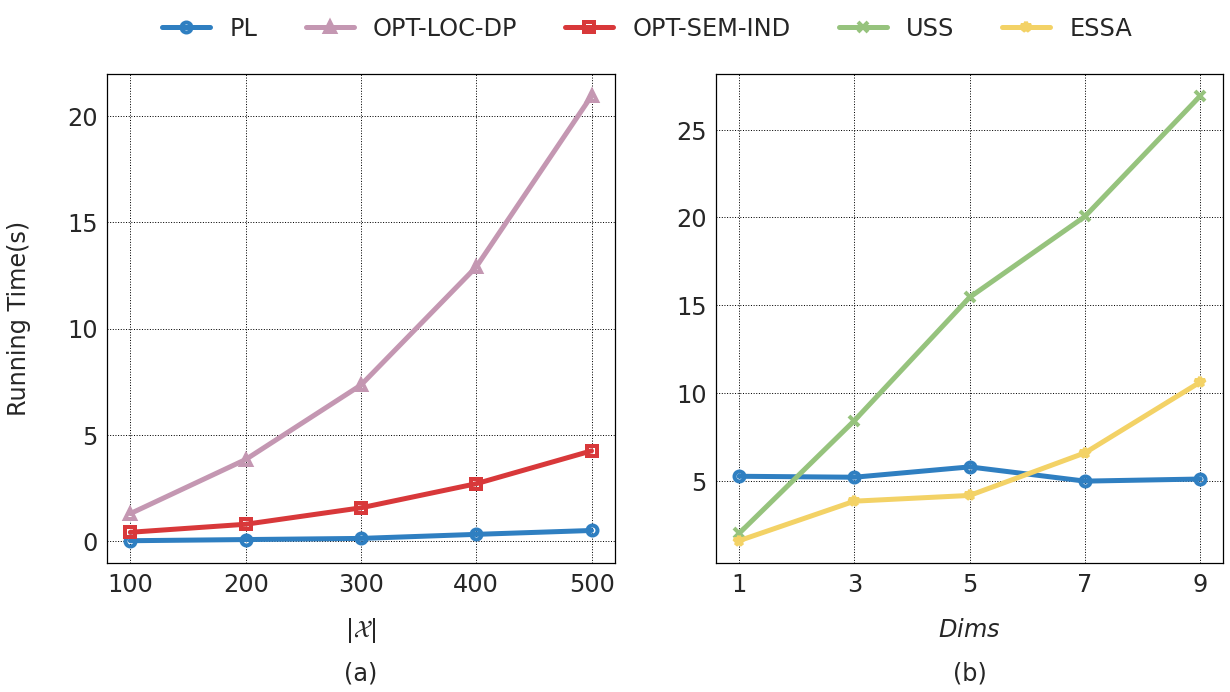

In [147]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(9)
fig.set_figwidth(20)

rt_x = pd.read_csv('../result/BJ_rt_vs_x.csv', index_col=0)
rt_ndims = pd.read_csv('../result/BJ_rt_vs_ndims.csv', index_col=0)

methods = ['PL', 'OPT-LOC-DP', 'OPT-SEM-IND', 'USS', 'ESSA']

df = rt_x.query('method == "OPT-LOC-DP" or method == "OPT-SEM-IND" or method == "PL"')
ax = axs[0]

for m in methods:
    y = df.query('method == @m')['t']
    if np.any(y):
        ax.plot(df['x_size'].unique(), y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])

df = rt_ndims.query('method != "OPT-LOC-DP" and method != "OPT-SEM-IND"')
ax = axs[1]
for m in methods:
    y = df.query('method == @m')['t']
    if np.any(y):
        ax.plot(df['ndim'].unique(), y, label=m, linewidth=5, marker=MARKERS[m], markerfacecolor='none', markersize=10, markeredgewidth=4, color=COLORS[m])
    
axs[0].set_ylabel('Running Time(s)', fontsize=24)
axs[0].yaxis.set_label_coords(-.15, .5)
axs[0].set_xlabel('(a)', fontsize=24)
axs[0].xaxis.set_label_coords(.5, -0.2)
axs[0].grid(True, lw=1, ls='dotted', c='black')
axs[0].text(x=0.5, y=-0.15, s=r'$|\mathcal{X}|$', transform=axs[0].transAxes, ha='center', fontsize=24)

lines = []
for m in methods:
    axlines, labels = axs[0].get_legend_handles_labels()
    if m not in labels:
        axlines, labels = axs[1].get_legend_handles_labels()
    lines.append(axlines[labels.index(m)])

fig.legend(lines, methods, ncol=5, bbox_to_anchor=(0.5, 0.95), edgecolor='white', loc='center', facecolor='white', fontsize=24)

axs[1].set_xticks(rt_ndims['ndim'].unique())
axs[1].grid(True, lw=1, ls='dotted', c='black')
axs[1].set_xlabel('(b)', fontsize=24) 
axs[1].text(x=0.5, y=-0.15, s=r'$Dims$', transform=axs[1].transAxes, ha='center', fontsize=24)
axs[1].xaxis.set_label_coords(.5, -0.2)
axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)

fig.subplots_adjust(hspace=0.35)
fig.savefig("../graph/rt.jpg", bbox_inches="tight", dpi=300)
fig.savefig("../graph/rt.pdf", bbox_inches="tight", dpi=300)